# Feature 
We will make another columns from the existing columns and see their contribution

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/interim/bitcoin_processed.csv")

In [3]:
df.head()

,Open,High,Low,Close,Quote asset volume,Number of trades,Taker buy quote asset volume
0,4261.48,4485.39,4200.74,4285.08,3.454770e+06,3427,2.678216e+06
1,4285.08,4371.52,3938.77,4108.37,5.086958e+06,5233,4.129123e+06
2,4108.37,4184.69,3850.00,4139.98,1.549484e+06,2153,1.118002e+06
3,4120.98,4211.08,4032.62,4086.29,1.930364e+06,2321,1.557401e+06
4,4069.13,4119.62,3911.79,4016.00,2.797232e+06,3972,2.255663e+06


In [4]:
# Let's make price_range and close_to_open column to see its contribution
df['price_range'] = df['High'] - df['Low']
df['close_to_open'] = df['Close'] - df['Open']

In [56]:
# sns.pairplot(df)

<Axes: >

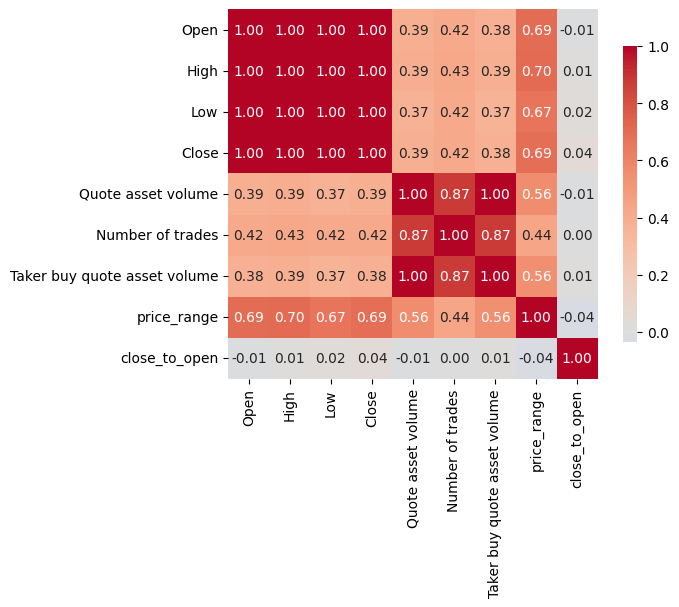

In [5]:
# Let's check contribution of each features using heatmap plot

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})


In [6]:
# Let's train linear regression model to predict the close price, we will not use train_test_split as this is time series data. We will use another method for it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


RMSE:  1.3654541737804767e-11
MAE:  1.1076346189448876e-11
MSE:  1.8644651006945244e-22


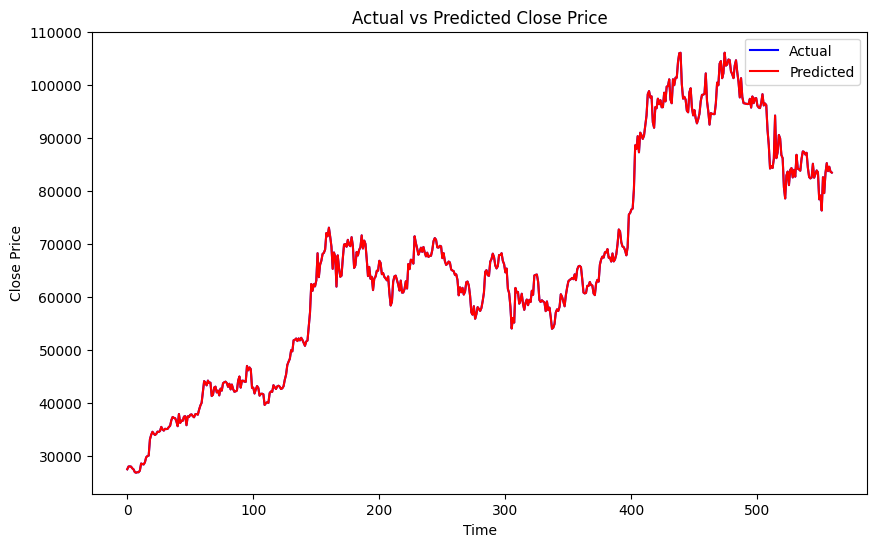

In [61]:
# let's train test split the data X_train, X_test, y_train, y_test

X = df.drop(columns=["Close"]).values
y = df["Close"].values

# we will not use train_test_split as this is time series data. We will use another method for it

X_train = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

# let's scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# let's train the model
model = LinearRegression()
model.fit(X_train, y_train)

# let's predict the test data
y_pred = model.predict(X_test)

# let's check the performance of the model
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# Plot the predicted vs actual values
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
